## Visualization

#### Importing Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Sales = pd.read_csv('SalesData.csv')
Sales.head(3)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29


#### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [3]:
A1 = Sales.groupby('Region')[['Sales2015','Sales2016']].sum()
A1

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


<Figure size 400x600 with 0 Axes>

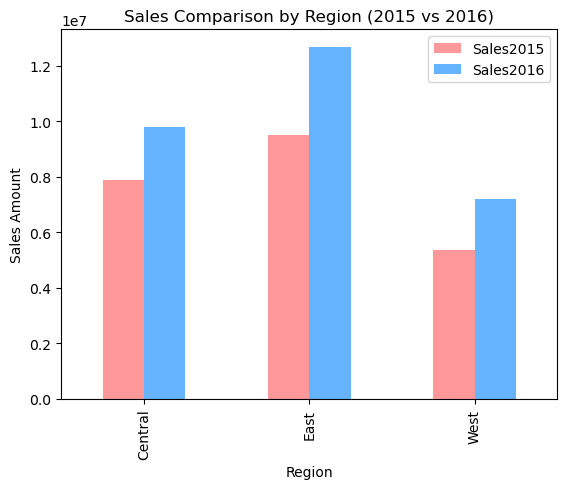

In [4]:
plt.figure(figsize = (4,6))
A1.plot(kind = 'bar',color=['#ff9999','#66b3ff'])
plt.xlabel('Region')
plt.ylabel('Sales Amount')
plt.title('Sales Comparison by Region (2015 vs 2016)')
plt.legend()
plt.show()

#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [5]:
A2 = Sales.groupby('Region').Sales2016.sum()
A2

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

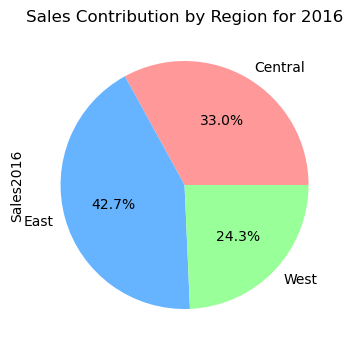

In [6]:
plt.figure(figsize = (4,6))
A2.plot(kind = 'pie',autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Sales Contribution by Region for 2016')
plt.show()

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [7]:
A3 = Sales.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum()


<Figure size 600x400 with 0 Axes>

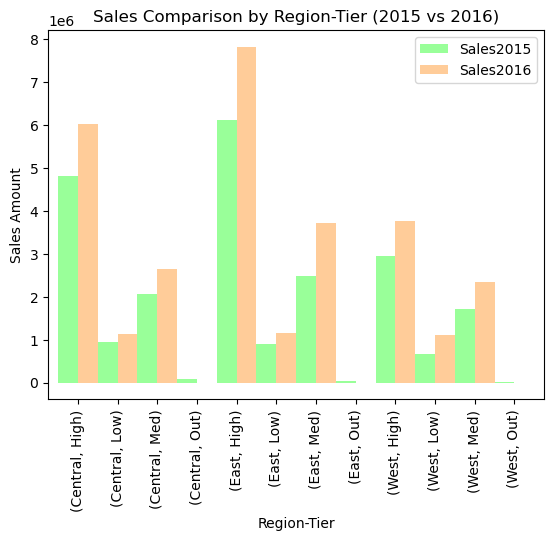

In [8]:
plt.figure(figsize = (6,4))
A3.plot(kind = 'bar',width = 1.0,color=['#99ff99','#ffcc99'])
plt.xlabel('Region-Tier')
plt.ylabel('Sales Amount')
plt.title('Sales Comparison by Region-Tier (2015 vs 2016)')
plt.legend()
plt.show()

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [9]:
#Data for east region
East = Sales[Sales['Region'] == 'East']

In [10]:
Q1 =East.groupby('State')[['Sales2015', 'Sales2016']].sum()

<Figure size 500x1000 with 0 Axes>

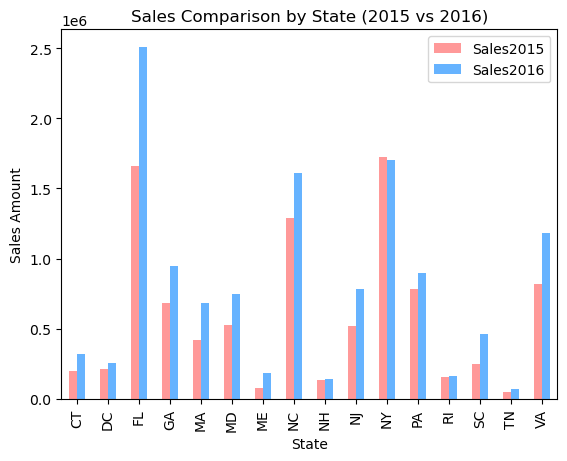

In [11]:
plt.figure(figsize = (5,10))
Q1.plot(kind = 'bar',width = 0.5,color=['#ff9999','#66b3ff'])
plt.xlabel('State')
plt.ylabel('Sales Amount')
plt.title('Sales Comparison by State (2015 vs 2016)')
plt.legend()
plt.show()
#NY is the state where the sales in both 2015 & 2016 are almost equal & declining each other

#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [12]:
W = Sales[Sales['Tier'] == 'High']

In [13]:
W1 = W.groupby('Division')[['Units2015','Units2016']].sum()

<Figure size 500x1000 with 0 Axes>

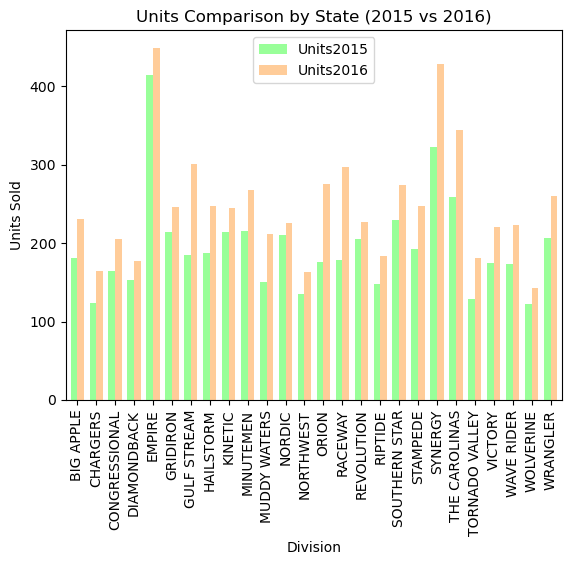

In [14]:
plt.figure(figsize = (5,10))
W1.plot(kind = 'bar',width = 0.7,color=['#99ff99','#ffcc99'])
plt.xlabel('Division')
plt.ylabel('Units Sold')
plt.title('Units Comparison by State (2015 vs 2016)')
plt.legend()
plt.show()
#There is no Division saw a decline in number of units sold in 2016 compared to 2015

#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
#### • Jan - Mar : Q1
#### • Apr - Jun : Q2
#### • Jul - Sep : Q3
#### • Oct - Dec : Q4

In [15]:
Sales['Qtr'] = np.where(Sales.Month.isin(['Jan','Feb','Mar']),'Q1',np.where(Sales.Month.isin(['Apr','May','Jun']),'Q2',np.where(Sales.Month.isin(['Jul','Aug','Sep']),'Q3','Q4')))

#### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [16]:
Y1 = Sales.groupby('Qtr')[['Sales2015','Sales2016']].sum()

<Figure size 500x1000 with 0 Axes>

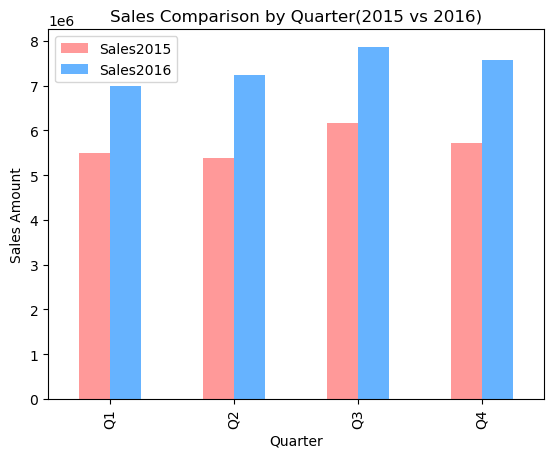

In [17]:
plt.figure(figsize = (5,10))
Y1.plot(kind = 'bar',width = 0.5,color=['#ff9999','#66b3ff'])
plt.xlabel('Quarter')
plt.ylabel('Sales Amount')
plt.title('Sales Comparison by Quarter(2015 vs 2016)')
plt.legend()
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
#### (Draw 4 pie charts representing a Quarter for each Tier)

In [18]:
Qtr1 = Sales[Sales['Qtr'] == 'Q1']
Qtr1 = Qtr1.groupby('Tier').Sales2016.sum()

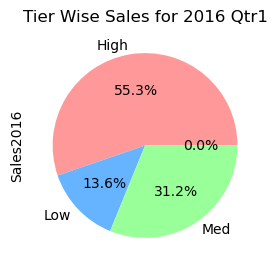

In [19]:
plt.figure(figsize = (3,3))
Qtr1.plot(kind = 'pie',autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Tier Wise Sales for 2016 Qtr1')
plt.show()

In [20]:
Qtr2 = Sales[Sales['Qtr'] == 'Q2']
Qtr2 = Qtr2.groupby('Tier').Sales2016.sum()

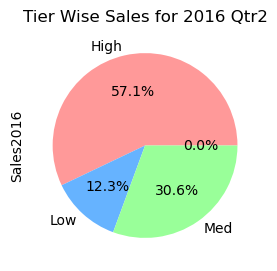

In [21]:
plt.figure(figsize = (3,3))
Qtr2.plot(kind = 'pie',autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Tier Wise Sales for 2016 Qtr2')
plt.show()

In [22]:
Qtr3 = Sales[Sales['Qtr'] == 'Q3']
Qtr3 = Qtr3.groupby('Tier').Sales2016.sum().reset_index()
#from tier out category contain negative value

In [23]:
qtr3 = Qtr3.iloc[0:3,:]

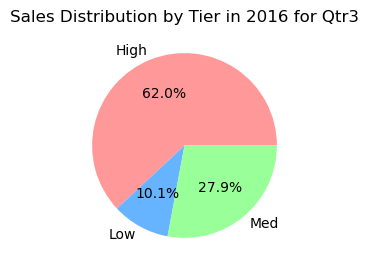

In [24]:
plt.figure(figsize=(3,3))
plt.pie(qtr3['Sales2016'], labels=qtr3['Tier'], autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Sales Distribution by Tier in 2016 for Qtr3')
plt.show()

In [25]:
Qtr4 = Sales[Sales['Qtr'] == 'Q4']
Qtr4 = Qtr4.groupby('Tier').Sales2016.sum()

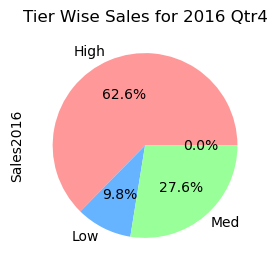

In [26]:
plt.figure(figsize = (3,3))
Qtr4.plot(kind = 'pie',autopct='%1.1f%%',colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Tier Wise Sales for 2016 Qtr4')
plt.show()

In [28]:
Q

,Tier,Sales2016
0,High,4.872559e+06
1,Low,7.951777e+05
2,Med,2.197058e+06
3,Out,-3.248530e+03
